In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import scipy.stats as st
from scipy.stats import linregress
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

In [96]:
portland = pd.read_csv("redfin_portland.csv")
print("Portland housing dataset has {} data points with {} variables each.".format(*portland.shape))

Portland housing dataset has 336 data points with 14 variables each.


In [95]:
Data = pd.read_csv("kc_house_data.csv")
print("KC housing dataset has {} data points with {} variables each.".format(*Data.shape))

KC housing dataset has 21613 data points with 21 variables each.


In [41]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
Data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [43]:
Data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
Data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [45]:
Data = Data.drop(['id','date','zipcode'], axis=1)

In [46]:
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [47]:
Data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

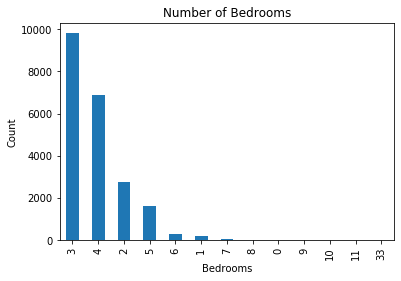

In [48]:
Data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

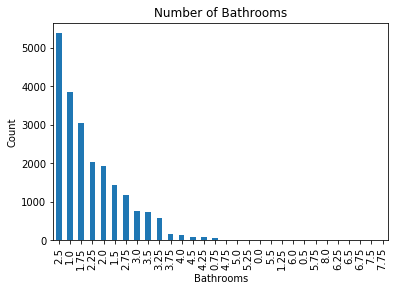

In [49]:
Data['bathrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

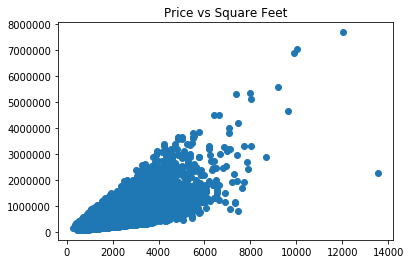

In [50]:
plt.scatter(Data['sqft_living'],Data['price'])
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Square Feet')

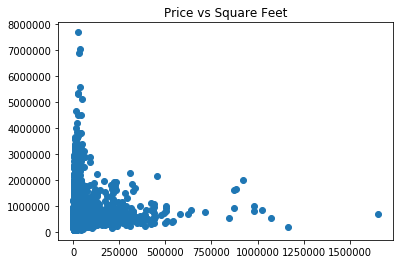

In [51]:
plt.scatter(Data['sqft_lot'],Data['price'])
plt.title("Price vs Square Feet")

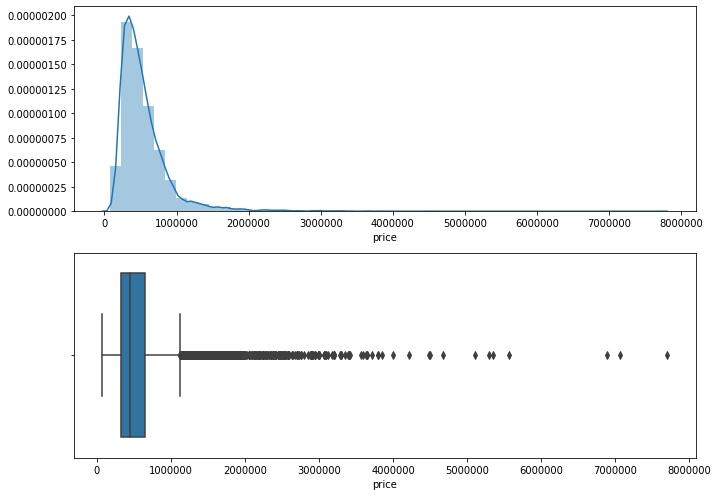

In [52]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(data['price'])
plt.tight_layout()

In [53]:
top = Data.sort_values('price',ascending = False).iloc[216:]

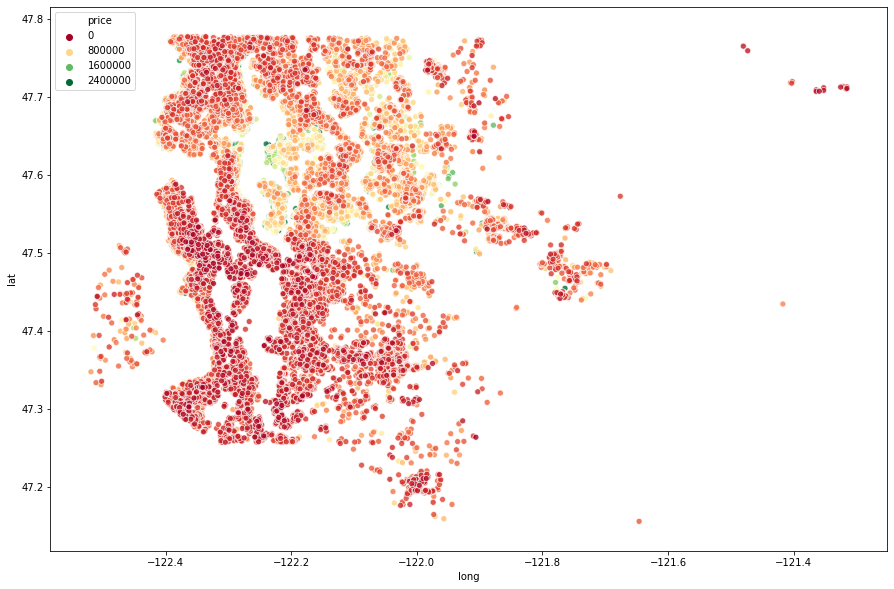

In [54]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=top,alpha = 0.8,palette = 'RdYlGn', hue='price')

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [59]:
y = Data['price'].values.reshape(-1, 1)
X = Data.drop(['price'], axis=1)
print(X.shape, y.shape)

(21613, 17) (21613, 1)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [61]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [64]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.6926180431772317


In [68]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(model.score(X_train,y_train)))
print("Test Score {:.2f}".format(model.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.69
Test Score 0.70


## Multiple Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[-36597.62583496,  33704.83867418,  82770.77495241,
          3916.14639591,   -986.2132423 ,  52662.07162946,
         38081.52388573,  19682.70939256, 112577.81318947,
         78491.83262386,  25213.96011373, -72972.72225462,
         10725.71236198,  77661.85372675, -16926.89704772,
         20419.48799332,  -9657.84261683]])

In [71]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test[0], 'Predicted': y_predd[0]})
df1 = df.head(10)
df1

,Actual,Predicted
0,1700000.0,996034.730166


In [72]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 125197.57
Mean Squared Error:38634533179.64
Root Mean Squared Error:196556.69
Variance score is: 0.70


In [111]:
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


## Keras Regression

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [75]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [76]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
114/114 [==============================] - 0s 3ms/step - loss: 428594036736.0000 - val_loss: 422009077760.0000
Epoch 2/400
114/114 [==============================] - 0s 1ms/step - loss: 426821615616.0000 - val_loss: 415539134464.0000
Epoch 3/400
114/114 [==============================] - 0s 1ms/step - loss: 400731078656.0000 - val_loss: 354867019776.0000
Epoch 4/400
114/114 [==============================] - 0s 1ms/step - loss: 280800854016.0000 - val_loss: 176290185216.0000
Epoch 5/400
114/114 [==============================] - 0s 1ms/step - loss: 113090658304.0000 - val_loss: 70693502976.0000
Epoch 6/400
114/114 [==============================] - 0s 1ms/step - loss: 68538097664.0000 - val_loss: 61868818432.0000
Epoch 7/400
114/114 [==============================] - 0s 2ms/step - loss: 62335766528.0000 - val_loss: 57163685888.0000
Epoch 8/400
114/114 [==============================] - 0s 2ms/step - loss: 58111201280.0000 - val_loss: 53389328384.0000
Epoch 9/400
114/114 [==

Epoch 135/400
114/114 [==============================] - 0s 1ms/step - loss: 30920771584.0000 - val_loss: 28728711168.0000
Epoch 136/400
114/114 [==============================] - 0s 1ms/step - loss: 30993440768.0000 - val_loss: 28774352896.0000
Epoch 137/400
114/114 [==============================] - 0s 1ms/step - loss: 30877757440.0000 - val_loss: 28644472832.0000
Epoch 138/400
114/114 [==============================] - 0s 1ms/step - loss: 30884722688.0000 - val_loss: 28642326528.0000
Epoch 139/400
114/114 [==============================] - 0s 1ms/step - loss: 30856032256.0000 - val_loss: 28660707328.0000
Epoch 140/400
114/114 [==============================] - 0s 1ms/step - loss: 30812129280.0000 - val_loss: 28681453568.0000
Epoch 141/400
114/114 [==============================] - 0s 1ms/step - loss: 30779621376.0000 - val_loss: 28557266944.0000
Epoch 142/400
114/114 [==============================] - 0s 1ms/step - loss: 30768951296.0000 - val_loss: 28547733504.0000
Epoch 143/400
11

114/114 [==============================] - 0s 1ms/step - loss: 28718798848.0000 - val_loss: 27131678720.0000
Epoch 268/400
114/114 [==============================] - 0s 1ms/step - loss: 28677148672.0000 - val_loss: 27127703552.0000
Epoch 269/400
114/114 [==============================] - 0s 1ms/step - loss: 28679591936.0000 - val_loss: 27076829184.0000
Epoch 270/400
114/114 [==============================] - 0s 1ms/step - loss: 28687509504.0000 - val_loss: 27101829120.0000
Epoch 271/400
114/114 [==============================] - 0s 1ms/step - loss: 28590665728.0000 - val_loss: 27154749440.0000
Epoch 272/400
114/114 [==============================] - 0s 1ms/step - loss: 28612227072.0000 - val_loss: 27193378816.0000
Epoch 273/400
114/114 [==============================] - 0s 1ms/step - loss: 28592379904.0000 - val_loss: 27044861952.0000
Epoch 274/400
114/114 [==============================] - 0s 1ms/step - loss: 28599304192.0000 - val_loss: 27056504832.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 27131082752.0000 - val_loss: 26060371968.0000
Epoch 400/400
114/114 [==============================] - 0s 1ms/step - loss: 27052732416.0000 - val_loss: 26016784384.0000


In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,502
Trainable params: 1,502
Non-trainable params: 0
_________________________________________________________________


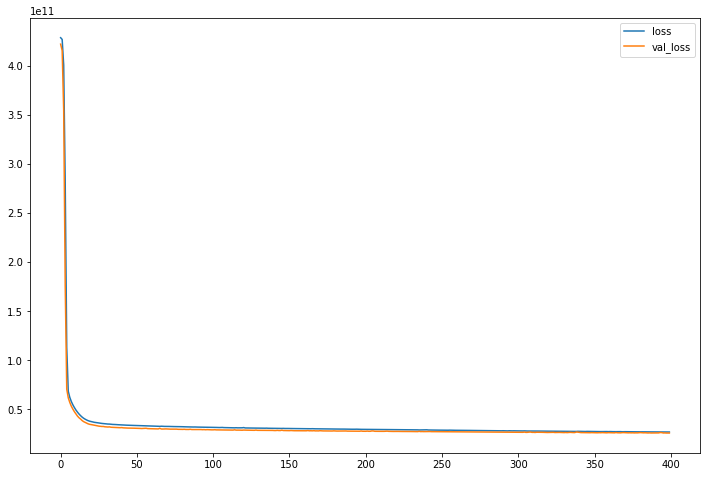

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [80]:
y_pred = model.predict(X_test)

In [81]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 100899.72
Mean Squared Error: 26016783983.46
Root Mean Squared Error: 161297.19
Variance score is: 0.80


## Testing the Models

In [82]:
house = Data.drop('price',axis = 1).iloc[1]

In [85]:
house = s_scaler.transform(house.values.reshape(-1,17))

In [87]:
model.predict(house)

array([[645294.8]], dtype=float32)

In [88]:
Data['price'][1]

538000.0

In [89]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 100899.72
Mean Squared Error(MSE): 26016783983.46
Root Mean Squared Error(RMSE): 161297.19
Variance score: 79.82

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 125197.57
Mean Squared Error(MSE):38634533179.64
Root Mean Squared Error(RMSE):196556.69
Variance score: 70.03
